## OBJECTIVE

The objective of this project is:

Apply machine learning techniques and determine which algorithm works better on diabetes dataset.

In [11]:
#load required packages

import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regression

## Model 

In [427]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [429]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

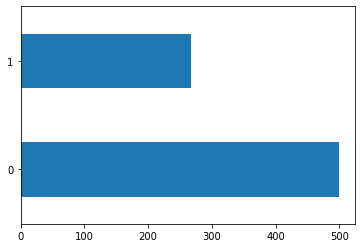

In [430]:
df["Outcome"].value_counts().plot.barh();

In [431]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [432]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [9]:
# using statsmodels

In [433]:
#1st Iteration - 8 variables
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:                 0.05922
Time:                        23:36:10   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [434]:
#This model can explain 60% of the variation in dependent variable. 
#SkinThickness,Insulin ,BMI, Diabetes Pedigree Function, Age are attributes to be eliminated in the next model
#as variables that influence the outcome should have a p-value less than 0.05,however in the next algorithms
#i am gonna use X= df.drop(["Outcome"], axis=1) for consistency

In [435]:
#2nd Iteration - 3 variables
var2=["Pregnancies", "Glucose","BloodPressure"]
X=df[var2]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.613118
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                            2
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:                 0.05207
Time:                        23:36:15   Log-Likelihood:                -470.87
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.835e-12
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.0951      0.024      3.996      0.000       0.048       0.142
Glucose           0.0122      0.002      5.804      0.000       0.008       0.016
BloodPressure    -0.0335      0.004     -8.692      0.000      -0.041      -0.026
=================================================================================
"""

In [436]:
#This model can explain 61% of the variation in dependent variable. All the variables show a p-value < 0.005.

In [437]:
#scikit-learn

In [438]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [439]:
loj_model.intercept_

array([-4.49549597])

In [440]:
loj_model.coef_

array([[ 0.11722845,  0.03235418, -0.00863672]])

## Predict  & Model Tuning

In [441]:
y_pred = loj_model.predict(X)

In [87]:
### Confusion matrix gives the number of cases that the model is able to accurately predict the outcomes, 
#and the number of cases the model gives false positive and false negatives

In [442]:
confusion_matrix(y, y_pred)

array([[444,  56],
       [131, 137]], dtype=int64)

In [88]:
#The confusion matrix shows that 444 + 137 are correct predictions and 131 + 56 are incorrect predictions.

In [443]:
accuracy_score(y, y_pred)

0.7565104166666666

In [444]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       500
           1       0.71      0.51      0.59       268

    accuracy                           0.76       768
   macro avg       0.74      0.70      0.71       768
weighted avg       0.75      0.76      0.75       768



In [91]:
#The model precision of model #2 (3 variables) is 75%

In [445]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [446]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.40746625, 0.59253375],
       [0.90008646, 0.09991354],
       [0.14059019, 0.85940981],
       [0.88783041, 0.11216959],
       [0.60071424, 0.39928576],
       [0.68898662, 0.31101338],
       [0.88615161, 0.11384839],
       [0.40190851, 0.59809149],
       [0.18121102, 0.81878898],
       [0.5848027 , 0.4151973 ]])

In [447]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [448]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [449]:
y_probs[0:10]

array([0.59253375, 0.09991354, 0.85940981, 0.11216959, 0.39928576,
       0.31101338, 0.11384839, 0.59809149, 0.81878898, 0.4151973 ])

In [97]:
# we decide to label it if the result is bigger than 0.5( it could be changed of course.)
#it is labeled as 1(more possibility to have diabetic)

In [450]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [451]:
y_pred[0:10]

[1, 0, 1, 0, 0, 0, 0, 1, 1, 0]

In [453]:
confusion_matrix(y, y_pred)

array([[444,  56],
       [131, 137]], dtype=int64)

In [452]:
accuracy_score(y, y_pred)

0.7565104166666666

In [454]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       500
           1       0.71      0.51      0.59       268

    accuracy                           0.76       768
   macro avg       0.74      0.70      0.71       768
weighted avg       0.75      0.76      0.75       768



In [455]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.59253375, 0.09991354, 0.85940981, 0.11216959, 0.39928576])

In [37]:
# split data as train and test for preparing macline learning algorithms.


In [456]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [457]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [458]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [459]:
#Performing a 10-fold cross-validation 

In [460]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

In [461]:
#The model precision of model #2 (3 variables) is 76% after cross-validation.

# Gaussian Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB

In [425]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [140]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [141]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [142]:
y_pred = nb_model.predict(X_test)

In [143]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [144]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

In [145]:
#The model precision of model is 77% after model tuning by using   Gaussian Naive Baye.

# KNN

## Prediction & Model

In [416]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [417]:
y_pred = knn_model.predict(X_test)

In [418]:
accuracy_score(y_test, y_pred)

0.7012987012987013

In [419]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



## Model Tuning

In [420]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [423]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [163]:
#From 768, 593 got correct outcome predicted.

In [152]:
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score:0.748637316561845
The best parameters: {'n_neighbors': 11}


In [153]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [154]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [122]:
y_pred = knn_tuned.predict(X_test)

In [123]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [155]:
#The model precision of model  is 73% after model tuning by using  KNN algorithms.

# SVC

## Prediction & Model

In [156]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [157]:
svm_model

SVC(kernel='linear')

In [158]:
y_pred = svm_model.predict(X_test)

In [159]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [160]:
#In order to not last  long time , C was chosen between 1 and 10.

In [161]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [164]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 5}


In [165]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [166]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [167]:
#The model precision of model  is 74% after model tuning by using  SVC Linear algorithms.

# RBF SVC

## Prediction &  Model

In [168]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [169]:
svc_model

SVC()

In [170]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [172]:
##In order to not last  long time , svc_params was chosen by a few values

In [173]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [174]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [175]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 10, 'gamma': 0.0001}


In [176]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [177]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [197]:
#The model precision of model  is 74% after model tuning by using  SVC RBF algorithms.

# Artificial Neural Network

## Prediction  & Model

In [506]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [507]:
from sklearn.preprocessing import StandardScaler  

In [508]:
scaler = StandardScaler()

In [518]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [519]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [520]:
from sklearn.neural_network import MLPClassifier

In [521]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [522]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

## Model Tuning

In [523]:
mlpc

MLPClassifier()

In [524]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\obo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='ada

In [525]:
##In order to not last  long time , mlpc_params was chosen by a few values

In [526]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [527]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [528]:
print("The best parameters: " + str(mlpc_cv_model.best_params_))

The best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


In [529]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha =  0.1, 
                           hidden_layer_sizes = (100,100),
                          solver = "adam")

In [530]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100))

In [531]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6926406926406926

In [532]:
##The model precision of model  is 69% after model tuning by using  ANN  algorithms.

# CART

## Prediction & Model

In [199]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [200]:
from sklearn.tree import DecisionTreeClassifier

In [201]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [202]:
cart_model

DecisionTreeClassifier()

In [207]:
pip install astor

Note: you may need to restart the kernel to use updated packages.


In [208]:
#pip install skompile
from skompiler import skompile

print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[2] <= 69.5 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (1 if x[1] <= 130.5 else 0) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else (0 if x[5] <= 22.399999618530273 else 1) if x[0] <= 5.0 else
    0) if x[5] <= 26.9499

In [209]:
x = [9]

In [210]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [211]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

## Model Tuning

In [212]:
cart_model

DecisionTreeClassifier()

In [213]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\obo\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, t

In [214]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [215]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [216]:
print("The best parameters: " + str(cart_cv_model.best_params_))

The best parameters: {'max_depth': 5, 'min_samples_split': 19}


In [217]:
#final

In [218]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [219]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [ ]:
##The model precision of model  is 75% after model tuning by using  CART  algorithms.

# Random Forests

In [220]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [221]:
from sklearn.ensemble import RandomForestClassifier

In [222]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [223]:
rf_model

RandomForestClassifier()

In [224]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Model Tuning

In [225]:
rf_model

RandomForestClassifier()

In [226]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\obo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for 

In [227]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [228]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [229]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [230]:
print("The best parameters: " + str(rf_cv_model.best_params_))

The best parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 1000}


In [ ]:
#final

In [231]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 5,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=5,
                       n_estimators=1000)

In [232]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [233]:
##The model precision of model  is 73% after model tuning by using  RF  algorithms.

In [234]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance Level of Dependents')

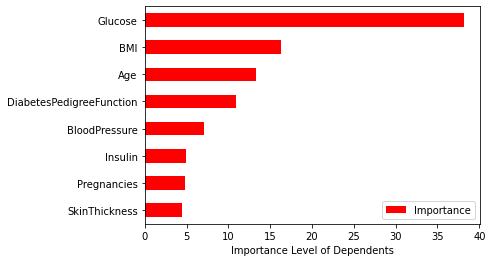

In [235]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance Level of Dependents")

In [236]:
#Basically, it can be seen that Glucose is an outstanding dependent for diabetes.

# Gradient Boosting Machines

In [365]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [238]:
from sklearn.ensemble import GradientBoostingClassifier

In [239]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [240]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [241]:
gbm_model

GradientBoostingClassifier()

In [242]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\obo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning rat

In [246]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [247]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [248]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [249]:
print("The best parameters: " + str(gbm_cv.best_params_))

The best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [250]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 100)

In [251]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [252]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [253]:
##The model precision of model  is 74% after model tuning by using  GBM  algorithms.

# XGBoost

In [254]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [255]:
#!pip install xgboost
from xgboost import XGBClassifier

In [256]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[21:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [257]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [258]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [259]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [260]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\obo\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
        code, we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective o

In [261]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [262]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [263]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[21:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [264]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [265]:
xgb = XGBClassifier(learning_rate = 0.02, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6)

In [266]:
xgb_tuned =  xgb.fit(X_train,y_train)

[21:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [267]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

In [268]:
##The model precision of model  is 75% after model tuning by using  XGBoost  algorithms.

# LightGBM

In [269]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [270]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [271]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [272]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [ ]:
## Model Tuning

In [ ]:
lgbm_model

In [273]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\obo\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (de

In [274]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [275]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [276]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [277]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [278]:
lgbm = LGBMClassifier(learning_rate = 0.05, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 20)

In [279]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [280]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [281]:
##The model precision of model  is 74% after model tuning by using  LightGBM  algorithms.

# CatBoost

## Prediction  & Model

In [282]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [283]:
#!pip install catboost
from catboost import CatBoostClassifier

In [284]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879822	total: 154ms	remaining: 2m 34s
1:	learn: 0.6843544	total: 159ms	remaining: 1m 19s
2:	learn: 0.6805937	total: 164ms	remaining: 54.6s
3:	learn: 0.6766011	total: 169ms	remaining: 42.1s
4:	learn: 0.6721103	total: 174ms	remaining: 34.6s
5:	learn: 0.6681927	total: 179ms	remaining: 29.7s
6:	learn: 0.6642263	total: 184ms	remaining: 26s
7:	learn: 0.6603263	total: 186ms	remaining: 23.1s
8:	learn: 0.6563030	total: 188ms	remaining: 20.8s
9:	learn: 0.6528911	total: 190ms	remaining: 18.8s
10:	learn: 0.6488276	total: 192ms	remaining: 17.3s
11:	learn: 0.6455457	total: 195ms	remaining: 16s
12:	learn: 0.6419444	total: 196ms	remaining: 14.9s
13:	learn: 0.6374939	total: 198ms	remaining: 14s
14:	learn: 0.6340194	total: 200ms	remaining: 13.1s
15:	learn: 0.6304776	total: 202ms	remaining: 12.4s
16:	learn: 0.6267531	total: 203ms	remaining: 11.7s
17:	learn: 0.6238199	total: 205ms	remaining: 11.2s
18:	learn: 0.6204938	total: 206ms	remaining: 10.6s
19:	learn: 0.6170

In [285]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [286]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [289]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863412	total: 14.8ms	remaining: 2.95s
1:	learn: 0.6811322	total: 19.6ms	remaining: 1.94s
2:	learn: 0.6753199	total: 24ms	remaining: 1.57s
3:	learn: 0.6697717	total: 28.3ms	remaining: 1.39s
4:	learn: 0.6642090	total: 32.7ms	remaining: 1.27s
5:	learn: 0.6577038	total: 37.2ms	remaining: 1.2s
6:	learn: 0.6522290	total: 41.7ms	remaining: 1.15s
7:	learn: 0.6466015	total: 46.1ms	remaining: 1.11s
8:	learn: 0.6408068	total: 50.6ms	remaining: 1.07s
9:	learn: 0.6358218	total: 54.9ms	remaining: 1.04s
10:	learn: 0.6300444	total: 59.2ms	remaining: 1.02s
11:	learn: 0.6240992	total: 63.6ms	remaining: 996ms
12:	learn: 0.6196618	total: 67.9ms	remaining: 977ms
13:	learn: 0.6149237	total: 72.2ms	remaining: 959ms
14:	learn: 0.6093146	total: 76.4ms	remaining: 942ms
15:	learn: 0.6047282	total: 80.8ms	remaining: 929ms
16:	learn: 0.6013242	total: 85.1ms	remaining: 917ms
17:	learn: 0.5958624	total: 89.6ms	remaining: 906ms
18:	learn: 0.590

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002F4DD7E0490>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [290]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [291]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.01, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863412	total: 3.54ms	remaining: 705ms
1:	learn: 0.6811322	total: 6.88ms	remaining: 681ms
2:	learn: 0.6753199	total: 9.83ms	remaining: 646ms
3:	learn: 0.6697717	total: 12.8ms	remaining: 629ms
4:	learn: 0.6642090	total: 15.9ms	remaining: 621ms
5:	learn: 0.6577038	total: 19.1ms	remaining: 619ms
6:	learn: 0.6522290	total: 22.2ms	remaining: 611ms
7:	learn: 0.6466015	total: 25ms	remaining: 600ms
8:	learn: 0.6408068	total: 27.8ms	remaining: 591ms
9:	learn: 0.6358218	total: 30.6ms	remaining: 582ms
10:	learn: 0.6300444	total: 33.4ms	remaining: 575ms
11:	learn: 0.6240992	total: 36.3ms	remaining: 569ms
12:	learn: 0.6196618	total: 39.2ms	remaining: 564ms
13:	learn: 0.6149237	total: 42.1ms	remaining: 559ms
14:	learn: 0.6093146	total: 45ms	remaining: 554ms
15:	learn: 0.6047282	total: 48ms	remaining: 552ms
16:	learn: 0.6013242	total: 50.8ms	remaining: 547ms
17:	learn: 0.5958624	total: 53.6ms	remaining: 542ms
18:	learn: 0.5903733	total: 56.5ms	remaining: 539ms
19:	learn: 0.5866505	total: 

In [292]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [293]:
##The model precision of model  is 75% after model tuning by using  CatBoost  algorithms.

# Compare All Models 

In [535]:
models = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in models:
    names=model.__class__.__name__
    if names== "MLPClassifier":
        y_pred=model.predict(X_test_scaled)
    else:
         y_pred=model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 69.2641%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 73.5931%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.4589%
----------------------------
CatBoostClassifier:
Accuracy: 75.3247%
----------------------------
LGBMClassifier:
Accuracy: 74.8918%
----------------------------
XGBClassifier:
Accuracy: 75.7576%


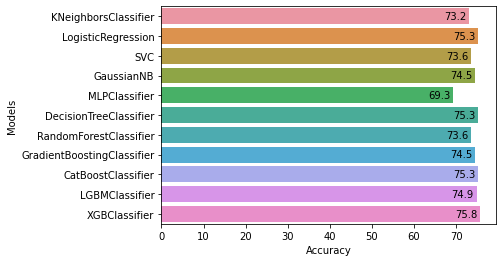

In [536]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names=model.__class__.__name__
    if names== "MLPClassifier":
        y_pred=model.predict(X_test_scaled)
    else:
         y_pred=model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
ax = sns.barplot(y="Models", x="Accuracy",  data=results, ci=None)

for p in ax.patches:
    ax.annotate("%.1f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-25, 0), textcoords='offset points', ha="left", va="center")


   

## CONCLUSION

The results show that eXtreme Gradient Boosting (XGBoost) algorithm is winner for this dataset.
However, for simplicity i used basic hiperparameters which can  cause in a big impact on the algorithms behave.
Even though XGB even so slow and there is a small difference in compete with competitors, it managed to win.
